**pandemic and hate crimes in NYC**
- from three aspects (number of hate crimes, Offense Category, Bias Motive Description	Offense) analyze how pandemic affect hate crimes in NYC

In [320]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset

This dataset is the most current data from NYPD that dates from 2019 to 2021. Since the first US Coronavirus Case happened in Jan, 2020, I use that as the beginning of the pandemic. 

In [321]:
hcrime_raw=pd.read_csv('NYPD_Hate_Crimes.csv', index_col=0, parse_dates=True)

In [322]:
hcrime_raw

,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Other Motive Description,Arrest Date,Arrest Id
Full Complaint ID,,,,,,,,,,,,,,
201900112220917,2019,3,03/07/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
201900112125917,2019,1,01/24/2019,1,PATROL BORO MAN SOUTH,NEW YORK,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
202100112173517,2021,3,03/06/2021,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-HISPANIC,Ethnicity/National Origin/Ancestry,NaN,NaN,NaN
201900112442817,2019,6,06/08/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MUSLIM,Religion/Religious Practice,NaN,06/08/2019,M19626067
201900112618217,2019,8,08/14/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-WHITE,Race/Color,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201912212568117,2019,10,10/26/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-BLACK,Race/Color,NaN,NaN,NaN
201912212498017,2019,9,09/15/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,NaN,NaN,NaN
201912212334717,2019,6,06/10/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN


### cleaning data

In [323]:
hcrime_raw.drop(['Complaint Precinct Code','Patrol Borough Name','Law Code Category Description','Offense Description','PD Code Description','Other Motive Description','Arrest Date','Arrest Id'], axis=1, inplace=True)

In [324]:
hcrime_raw['Record Create Date']=pd.to_datetime(hcrime_raw['Record Create Date'], format='%m/%d/%Y')

In [325]:
hcrime_raw

,Complaint Year Number,Month Number,Record Create Date,County,Bias Motive Description,Offense Category
Full Complaint ID,,,,,,
201900112220917,2019,3,2019-03-07,NEW YORK,ANTI-JEWISH,Religion/Religious Practice
201900112125917,2019,1,2019-01-24,NEW YORK,ANTI-JEWISH,Religion/Religious Practice
202100112173517,2021,3,2021-03-06,NEW YORK,ANTI-HISPANIC,Ethnicity/National Origin/Ancestry
201900112442817,2019,6,2019-06-08,NEW YORK,ANTI-MUSLIM,Religion/Religious Practice
201900112618217,2019,8,2019-08-14,NEW YORK,ANTI-WHITE,Race/Color
...,...,...,...,...,...,...
201912212568117,2019,10,2019-10-26,RICHMOND,ANTI-BLACK,Race/Color
201912212498017,2019,9,2019-09-15,RICHMOND,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation
201912212334717,2019,6,2019-06-10,RICHMOND,ANTI-JEWISH,Religion/Religious Practice


In [326]:
hcrime_raw['Month Number'] = hcrime_raw['Record Create Date'].dt.to_period('M')

In [327]:
hcrime_raw

,Complaint Year Number,Month Number,Record Create Date,County,Bias Motive Description,Offense Category
Full Complaint ID,,,,,,
201900112220917,2019,2019-03,2019-03-07,NEW YORK,ANTI-JEWISH,Religion/Religious Practice
201900112125917,2019,2019-01,2019-01-24,NEW YORK,ANTI-JEWISH,Religion/Religious Practice
202100112173517,2021,2021-03,2021-03-06,NEW YORK,ANTI-HISPANIC,Ethnicity/National Origin/Ancestry
201900112442817,2019,2019-06,2019-06-08,NEW YORK,ANTI-MUSLIM,Religion/Religious Practice
201900112618217,2019,2019-08,2019-08-14,NEW YORK,ANTI-WHITE,Race/Color
...,...,...,...,...,...,...
201912212568117,2019,2019-10,2019-10-26,RICHMOND,ANTI-BLACK,Race/Color
201912212498017,2019,2019-09,2019-09-15,RICHMOND,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation
201912212334717,2019,2019-06,2019-06-10,RICHMOND,ANTI-JEWISH,Religion/Religious Practice


## Data Visualizations

**1. counts number of hate crimes happened each month 2019-2021**

In [328]:
month_year=hcrime_raw.groupby('Month Number').size().reset_index().rename(columns={0: 'counts'})


In [329]:
month_year

,Month Number,counts
0,2019-01,36
1,2019-02,31
2,2019-03,54
3,2019-04,28
4,2019-05,36
5,2019-06,37
6,2019-07,29
7,2019-08,45
8,2019-09,29
9,2019-10,48


In [330]:
Month_year = (
    month_year
    .reset_index()
    .pivot_table(index="Month Number", values="counts")
)
Month_year

,counts
Month Number,
2019-01,36
2019-02,31
2019-03,54
2019-04,28
2019-05,36
2019-06,37
2019-07,29
2019-08,45
2019-09,29


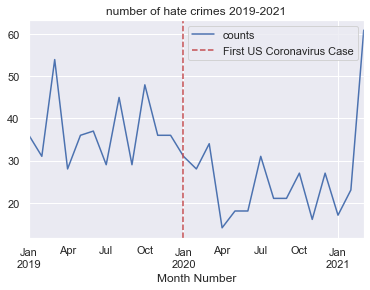

In [331]:
Month_year.plot()
plt.axvline(pd.Timestamp("2020-01"), color='r', linestyle='--', label='First US Coronavirus Case')
plt.title('number of hate crimes 2019-2021')
plt.legend()

In [332]:
hcrime=hcrime_raw.set_index('Record Create Date')

In [333]:
hcrime

,Complaint Year Number,Month Number,County,Bias Motive Description,Offense Category
Record Create Date,,,,,
2019-03-07,2019,2019-03,NEW YORK,ANTI-JEWISH,Religion/Religious Practice
2019-01-24,2019,2019-01,NEW YORK,ANTI-JEWISH,Religion/Religious Practice
2021-03-06,2021,2021-03,NEW YORK,ANTI-HISPANIC,Ethnicity/National Origin/Ancestry
2019-06-08,2019,2019-06,NEW YORK,ANTI-MUSLIM,Religion/Religious Practice
2019-08-14,2019,2019-08,NEW YORK,ANTI-WHITE,Race/Color
...,...,...,...,...,...
2019-10-26,2019,2019-10,RICHMOND,ANTI-BLACK,Race/Color
2019-09-15,2019,2019-09,RICHMOND,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation
2019-06-10,2019,2019-06,RICHMOND,ANTI-JEWISH,Religion/Religious Practice


In [334]:
Month_year.head()

,counts
Month Number,
2019-01,36
2019-02,31
2019-03,54
2019-04,28
2019-05,36


In [335]:
Month_year1=Month_year.reset_index()
Month_year1.head()

,Month Number,counts
0,2019-01,36
1,2019-02,31
2,2019-03,54
3,2019-04,28
4,2019-05,36


In [336]:
Month_year1['year'] = Month_year1['Month Number'].dt.strftime('%Y')
Month_year1.head()

,Month Number,counts,year
0,2019-01,36,2019
1,2019-02,31,2019
2,2019-03,54,2019
3,2019-04,28,2019
4,2019-05,36,2019


In [337]:
multi=Month_year1.set_index(['year','Month Number'])
multi

counts
year Month Number        
2019 2019-01           36
     2019-02           31
     2019-03           54
     2019-04           28
     2019-05           36
     2019-06           37
     2019-07           29
     2019-08           45
     2019-09           29
     2019-10           48
     2019-11           36
     2019-12           36
2020 2020-01           31
     2020-02           28
     2020-03           34
     2020-04           14
     2020-05           18
     2020-06           18
     2020-07           31
     2020-08           21
     2020-09           21
     2020-10           27
     2020-11           16
     2020-12           27
2021 2021-01           17
     2021-02           23
     2021-03           61

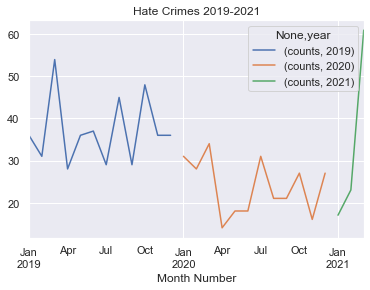

In [369]:
multi.reset_index().pivot('Month Number','year').plot(title='Hate Crimes 2019-2021', grid=True)

In [339]:
Month_year2=Month_year.reset_index()
Month_year2['year'] = Month_year2['Month Number'].dt.strftime('%Y')


Month_year2['Month Number'] = Month_year2['Month Number'].dt.strftime('%m')
Month_year2

,Month Number,counts,year
0,01,36,2019
1,02,31,2019
2,03,54,2019
3,04,28,2019
4,05,36,2019
5,06,37,2019
6,07,29,2019
7,08,45,2019
8,09,29,2019
9,10,48,2019


**hate crimes trend**

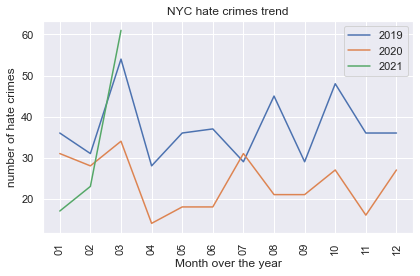

In [340]:
fig, ax = plt.subplots()
ax.set_xticklabels(Month_year2['Month Number'].unique(), rotation=90)

for name, group in Month_year2.groupby('year'):
    ax.plot(group['Month Number'], group['counts'], label=name)

plt.title('NYC hate crimes trend')
plt.xlabel('Month over the year')
plt.ylabel('number of hate crimes')
ax.legend()
plt.tight_layout()
plt.show()

**Conclusion: number of hate crimes**
Through previous three graphs, it shows that how pandemic affects the number of hate crimes in NYC. In 2020, when pandemic begins, the hate crimes decrease and the overall number of hate crimes is below 2019. However, starts from Feb, 2021, the number of hate crimes dramatically increase

In [341]:
Month_year.pct_change()

,counts
Month Number,
2019-01,NaN
2019-02,-0.138889
2019-03,0.741935
2019-04,-0.481481
2019-05,0.285714
2019-06,0.027778
2019-07,-0.216216
2019-08,0.551724
2019-09,-0.355556


**2. offense category and pandemic**

In [342]:
reason=hcrime.groupby(['Offense Category','Month Number']).size().reset_index().rename(columns={0: 'counts'})

In [343]:
reason

,Offense Category,Month Number,counts
0,Age,2020-06,1
1,Disability,2019-07,1
2,Ethnicity/National Origin/Ancestry,2019-01,1
3,Ethnicity/National Origin/Ancestry,2019-02,2
4,Ethnicity/National Origin/Ancestry,2019-03,6
...,...,...,...
113,Sexual Orientation,2020-11,1
114,Sexual Orientation,2020-12,4
115,Sexual Orientation,2021-01,2
116,Sexual Orientation,2021-02,2


In [344]:
reason=reason.reset_index()
reason['year'] = reason['Month Number'].dt.strftime('%Y')

In [345]:
reason

,index,Offense Category,Month Number,counts,year
0,0,Age,2020-06,1,2020
1,1,Disability,2019-07,1,2019
2,2,Ethnicity/National Origin/Ancestry,2019-01,1,2019
3,3,Ethnicity/National Origin/Ancestry,2019-02,2,2019
4,4,Ethnicity/National Origin/Ancestry,2019-03,6,2019
...,...,...,...,...,...
113,113,Sexual Orientation,2020-11,1,2020
114,114,Sexual Orientation,2020-12,4,2020
115,115,Sexual Orientation,2021-01,2,2021
116,116,Sexual Orientation,2021-02,2,2021


In [346]:
reason.drop(['index','Month Number'], axis=1, inplace=True)

In [347]:
reason

,Offense Category,counts,year
0,Age,1,2020
1,Disability,1,2019
2,Ethnicity/National Origin/Ancestry,1,2019
3,Ethnicity/National Origin/Ancestry,2,2019
4,Ethnicity/National Origin/Ancestry,6,2019
...,...,...,...
113,Sexual Orientation,1,2020
114,Sexual Orientation,4,2020
115,Sexual Orientation,2,2021
116,Sexual Orientation,2,2021


In [348]:
reason=reason.groupby(['Offense Category','year']).size().reset_index().rename(columns={0: 'counts'})

In [349]:
reason

,Offense Category,year,counts
0,Age,2020,1
1,Disability,2019,1
2,Ethnicity/National Origin/Ancestry,2019,10
3,Ethnicity/National Origin/Ancestry,2020,4
4,Ethnicity/National Origin/Ancestry,2021,3
5,Gender,2019,8
6,Gender,2020,8
7,Gender,2021,2
8,Race/Color,2019,12
9,Race/Color,2020,12


In [350]:
multi_reason=reason.set_index(['Offense Category', 'year'])
multi_reason

counts
Offense Category                   year        
Age                                2020       1
Disability                         2019       1
Ethnicity/National Origin/Ancestry 2019      10
                                   2020       4
                                   2021       3
Gender                             2019       8
                                   2020       8
                                   2021       2
Race/Color                         2019      12
                                   2020      12
                                   2021       3
Religion/Religious Practice        2019      12
                                   2020      12
                                   2021       3
Sexual Orientation                 2019      12
                                   2020      12
                                   2021       3

In [351]:
multi_reason1=pd.pivot_table(multi_reason, index= 'Offense Category', columns='year', values="counts",fill_value=0)
multi_reason1

year,2019,2020,2021
Offense Category,,,
Age,0,1,0
Disability,1,0,0
Ethnicity/National Origin/Ancestry,10,4,3
Gender,8,8,2
Race/Color,12,12,3
Religion/Religious Practice,12,12,3
Sexual Orientation,12,12,3


In [352]:
multi_reason2=multi_reason1.stack()

In [353]:
multi_reason2

Offense Category                    year
Age                                 2019     0
                                    2020     1
                                    2021     0
Disability                          2019     1
                                    2020     0
                                    2021     0
Ethnicity/National Origin/Ancestry  2019    10
                                    2020     4
                                    2021     3
Gender                              2019     8
                                    2020     8
                                    2021     2
Race/Color                          2019    12
                                    2020    12
                                    2021     3
Religion/Religious Practice         2019    12
                                    2020    12
                                    2021     3
Sexual Orientation                  2019    12
                                    2020    12
                   

In [354]:
Multi_reason=pd.DataFrame(multi_reason2)

In [370]:
Multi_reason.head()

counts
Offense Category year        
Age              2019       0
                 2020       1
                 2021       0
Disability       2019       1
                 2020       0

In [356]:
Multi_reason.columns=['counts']
Multi_reason

counts
Offense Category                   year        
Age                                2019       0
                                   2020       1
                                   2021       0
Disability                         2019       1
                                   2020       0
                                   2021       0
Ethnicity/National Origin/Ancestry 2019      10
                                   2020       4
                                   2021       3
Gender                             2019       8
                                   2020       8
                                   2021       2
Race/Color                         2019      12
                                   2020      12
                                   2021       3
Religion/Religious Practice        2019      12
                                   2020      12
                                   2021       3
Sexual Orientation                 2019      12
                                   2020      12
                                   2021       3

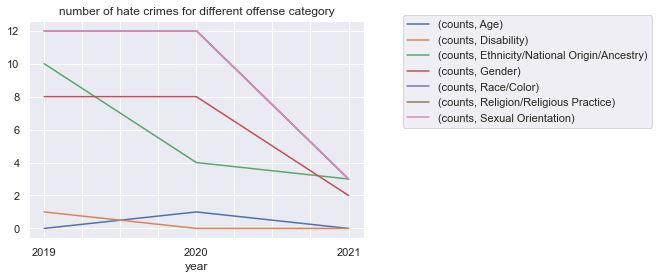

In [371]:
ax=Multi_reason.reset_index().pivot('year','Offense Category').plot(title='number of hate crimes for different offense category', grid=True)
ax.legend(bbox_to_anchor=(1.1, 1.05))


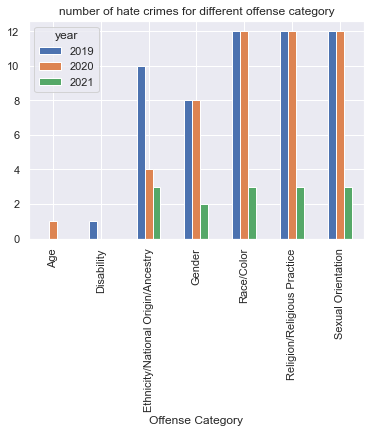

In [372]:
multi_reason1.plot(kind='bar', title='number of hate crimes for different offense category')

**Conclusion: Offense Category**
Both line and bar plot show how pandemic affects offense category. We can see that in 2020, the hate crimes that is acted based on ethnicity and national origin increases. Number of hate crimes in 2021 is lower than previous two years, the reason is that the data only includes data from Jan, 2019- March, 2021. 

**3. Bias Motivation**

In [359]:
bias=hcrime.groupby(['Bias Motive Description','Month Number']).size().reset_index().rename(columns={0: 'counts'})

In [360]:
bias

,Bias Motive Description,Month Number,counts
0,60 YRS AND OLDER,2020-06,1
1,ANTI-ARAB,2019-01,1
2,ANTI-ARAB,2019-06,3
3,ANTI-ARAB,2019-09,1
4,ANTI-ARAB,2020-05,1
...,...,...,...
197,ANTI-WHITE,2020-04,1
198,ANTI-WHITE,2020-06,1
199,ANTI-WHITE,2020-07,2
200,ANTI-WHITE,2020-08,3


In [361]:
bias=bias.reset_index()
bias['year'] = bias['Month Number'].dt.strftime('%Y')
bias

,index,Bias Motive Description,Month Number,counts,year
0,0,60 YRS AND OLDER,2020-06,1,2020
1,1,ANTI-ARAB,2019-01,1,2019
2,2,ANTI-ARAB,2019-06,3,2019
3,3,ANTI-ARAB,2019-09,1,2019
4,4,ANTI-ARAB,2020-05,1,2020
...,...,...,...,...,...
197,197,ANTI-WHITE,2020-04,1,2020
198,198,ANTI-WHITE,2020-06,1,2020
199,199,ANTI-WHITE,2020-07,2,2020
200,200,ANTI-WHITE,2020-08,3,2020


In [362]:
bias.drop(['index','Month Number'], axis=1, inplace=True)

In [363]:
bias

,Bias Motive Description,counts,year
0,60 YRS AND OLDER,1,2020
1,ANTI-ARAB,1,2019
2,ANTI-ARAB,3,2019
3,ANTI-ARAB,1,2019
4,ANTI-ARAB,1,2020
...,...,...,...
197,ANTI-WHITE,1,2020
198,ANTI-WHITE,1,2020
199,ANTI-WHITE,2,2020
200,ANTI-WHITE,3,2020


In [364]:
bias=bias.groupby(['Bias Motive Description','year']).size().reset_index().rename(columns={0: 'counts'})

In [365]:
multi_bias=bias.set_index(['Bias Motive Description', 'year'])
multi_bias

counts
Bias Motive Description           year        
60 YRS AND OLDER                  2020       1
ANTI-ARAB                         2019       3
                                  2020       1
ANTI-ASIAN                        2019       1
                                  2020       9
                                  2021       3
ANTI-BLACK                        2019      12
                                  2020      11
                                  2021       3
ANTI-BUDDHIST                     2019       2
ANTI-CATHOLIC                     2019       6
                                  2020       5
ANTI-FEMALE                       2020       3
                                  2021       1
ANTI-FEMALE HOMOSEXUAL (LESBIAN)  2019       4
                                  2020       4
                                  2021       1
ANTI-GENDER NON-CONFORMING        2020       2
ANTI-HINDU                        2020       2
ANTI-HISPANIC                     2019       6
                                  2020       1
                                  2021       1
ANTI-JEHOVAHS WITNESS             2019       1
ANTI-JEWISH                       2019      12
                                  2020      12
                                  2021       3
ANTI-LGBT (MIXED GROUP)           2019       4
                                  2020       2
                                  2021       1
ANTI-MALE HOMOSEXUAL (GAY)        2019      12
                                  2020      10
                                  2021       3
ANTI-MULTI-RACIAL GROUPS          2019       1
                                  2020       2
ANTI-MUSLIM                       2019      10
                                  2020       4
                                  2021       1
ANTI-OTHER ETHNICITY              2019       5
                                  2020       2
                                  2021       2
ANTI-OTHER RELIGION               2019       2
ANTI-PHYSICAL DISABILITY          2019       1
ANTI-RELIGIOUS PRACTICE GENERALLY 2020       1
ANTI-TRANSGENDER                  2019       8
                                  2020       4
                                  2021       2
ANTI-WHITE                        2019       9
                                  2020       6

In [366]:
multi_bias1=pd.pivot_table(multi_bias, index= 'Bias Motive Description', columns='year', values="counts",fill_value=0)
multi_bias1

year,2019,2020,2021
Bias Motive Description,,,
60 YRS AND OLDER,0,1,0
ANTI-ARAB,3,1,0
ANTI-ASIAN,1,9,3
ANTI-BLACK,12,11,3
ANTI-BUDDHIST,2,0,0
ANTI-CATHOLIC,6,5,0
ANTI-FEMALE,0,3,1
ANTI-FEMALE HOMOSEXUAL (LESBIAN),4,4,1
ANTI-GENDER NON-CONFORMING,0,2,0


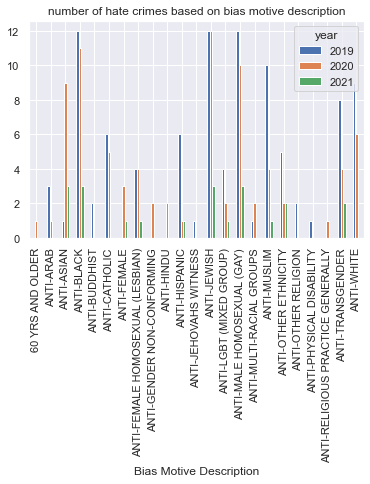

In [373]:
multi_bias1.plot(kind='bar', title='number of hate crimes based on bias motive description')

**Conclusion: bias motive description**
The reason that I am analyzing bias motivation is that I want to see does the data proves that is pandemic cause the rise in anti-Asian hate crimes. From the graph, we can see the hate crimes toward Asians did increase dramatically in 2020 compared to 2019. 

## Reference

dataset: https://data.cityofnewyork.us/Public-Safety/NYPD-Hate-Crimes/bqiq-cu78
https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020

code references: 
- https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce
- https://dfrieds.com/data-analysis/create-year-month-column.html
- https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
- https://www.datasciencemadesimple.com/get-year-from-date-pandas-python-2/
- https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-wo
- https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
- https://realpython.com/pandas-groupby/
- https://www.dataquest.io/blog/pandas-pivot-table/
- https://www.geeksforgeeks.org/pandas-multi-index-and-groupbys/
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
- https://www.datacamp.com/community/tutorials/pandas-multi-index
- https://riptutorial.com/pandas/example/18695/how-to-change-multiindex-columns-to-standard-columns